# Examples from the _swprepost_ Readme

> Joseph P. Vantassel, The University of Texas at Austin

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np

import swprepost

## GroundModel

### Import 100 ground models in less than 0.5 seconds

In [2]:
time_start = time.perf_counter()
gm_suite = swprepost.GroundModelSuite.from_geopsy(fname="inputs/from_geopsy_100gm.txt")
time_stop = time.perf_counter()
print(f"Elapsed Time: {np.round(time_stop - time_start)} seconds.")
print(gm_suite)

Elapsed Time: 0.0 seconds.
GroundModelSuite with 100 GroundModels.


### Plot the ground models

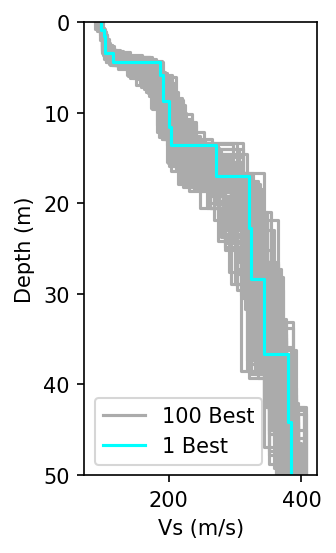

In [3]:
fig, ax = plt.subplots(figsize=(2,4), dpi=150)
# Plot 100 best
label = "100 Best"
for gm in gm_suite:
    ax.plot(gm.vs2, gm.depth, color="#ababab", label=label)
    label=None
# Plot the single best in different color
ax.plot(gm_suite[0].vs2, gm_suite[0].depth, color="#00ffff", label="1 Best")
ax.set_ylim(50,0)
ax.set_xlabel("Vs (m/s)")
ax.set_ylabel("Depth (m)")
ax.legend()
plt.show()

### Compute and plot their uncertainty

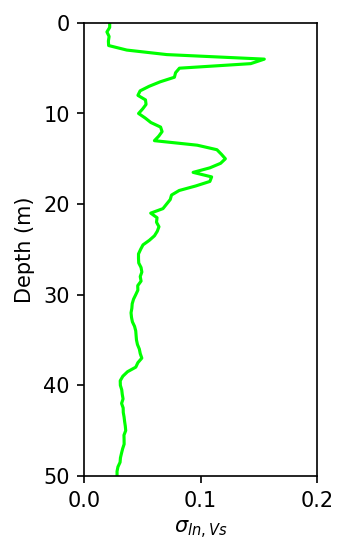

In [4]:
fig, ax = plt.subplots(figsize=(2,4), dpi=150)
disc_depth, siglnvs = gm_suite.sigma_ln()
ax.plot(siglnvs, disc_depth, color="#00ff00")
ax.set_xlim(0, 0.2)
ax.set_ylim(50,0)
ax.set_xlabel("$\sigma_{ln,Vs}$")
ax.set_ylabel("Depth (m)")
plt.show()